Importing libraries

In [1]:
import pandas as pd                   # for data manipulation
import numpy as np                    # for numerical operations
import matplotlib.pyplot as plt       # for plotting
import seaborn as sns                 # for data visualization

from sklearn.model_selection import train_test_split, GridSearchCV                     #for splitting data and hyperparameter tuning
from sklearn.linear_model import Ridge                                                 # for regression model
from sklearn.metrics import mean_squared_error, r2_score                               # for model evaluation metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder                        # for data preprocessing
from sklearn.compose import ColumnTransformer                                          # for combining preprocessing steps
from sklearn.pipeline import Pipeline                                                  # for creating a machine learning pipeline

Loading the dataset

In [2]:
df = pd.read_csv('SpotifyFeatures.csv')

Getting Insights from the dataset

In [3]:
df.shape          # NUMBER OF ROWS AND COLUMNS

(150907, 18)

In [4]:

df.size           # TOTAL NUMBER OF ELEMENTS

2716326

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150907 entries, 0 to 150906
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             150907 non-null  object 
 1   artist_name       150907 non-null  object 
 2   track_name        150907 non-null  object 
 3   track_id          150907 non-null  object 
 4   popularity        150907 non-null  int64  
 5   acousticness      150907 non-null  float64
 6   danceability      150907 non-null  float64
 7   duration_ms       150907 non-null  int64  
 8   energy            150907 non-null  float64
 9   instrumentalness  150907 non-null  float64
 10  key               150907 non-null  object 
 11  liveness          150907 non-null  float64
 12  loudness          150907 non-null  float64
 13  mode              150907 non-null  object 
 14  speechiness       150907 non-null  float64
 15  tempo             150907 non-null  float64
 16  time_signature    15

In [6]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,150907.000000,150907.000000,150907.000000,1.509070e+05,150907.000000,150907.000000,150907.000000,150907.000000,150907.000000,150907.000000,150907.000000
mean,43.309349,0.338374,0.569424,2.362627e+05,0.571211,0.133045,0.191702,-9.211509,0.095901,118.817887,0.457372
std,18.867583,0.351273,0.183530,1.033550e+05,0.260117,0.284439,0.160470,5.901669,0.104109,30.351572,0.252161
min,0.000000,0.000000,0.058200,1.538700e+04,0.000020,0.000000,0.009670,-47.599000,0.022200,32.080000,0.000000
25%,32.000000,0.029000,0.449000,1.876270e+05,0.393000,0.000000,0.096300,-11.077000,0.037100,94.122500,0.251000
50%,47.000000,0.184000,0.585000,2.222930e+05,0.605000,0.000058,0.125000,-7.448000,0.051200,118.011000,0.445000
75%,57.000000,0.639000,0.706000,2.652735e+05,0.781000,0.027700,0.236000,-5.348000,0.103000,139.938000,0.653000
max,100.000000,0.996000,0.989000,4.830606e+06,0.999000,0.997000,1.000000,3.744000,0.965000,242.903000,1.000000


In [7]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


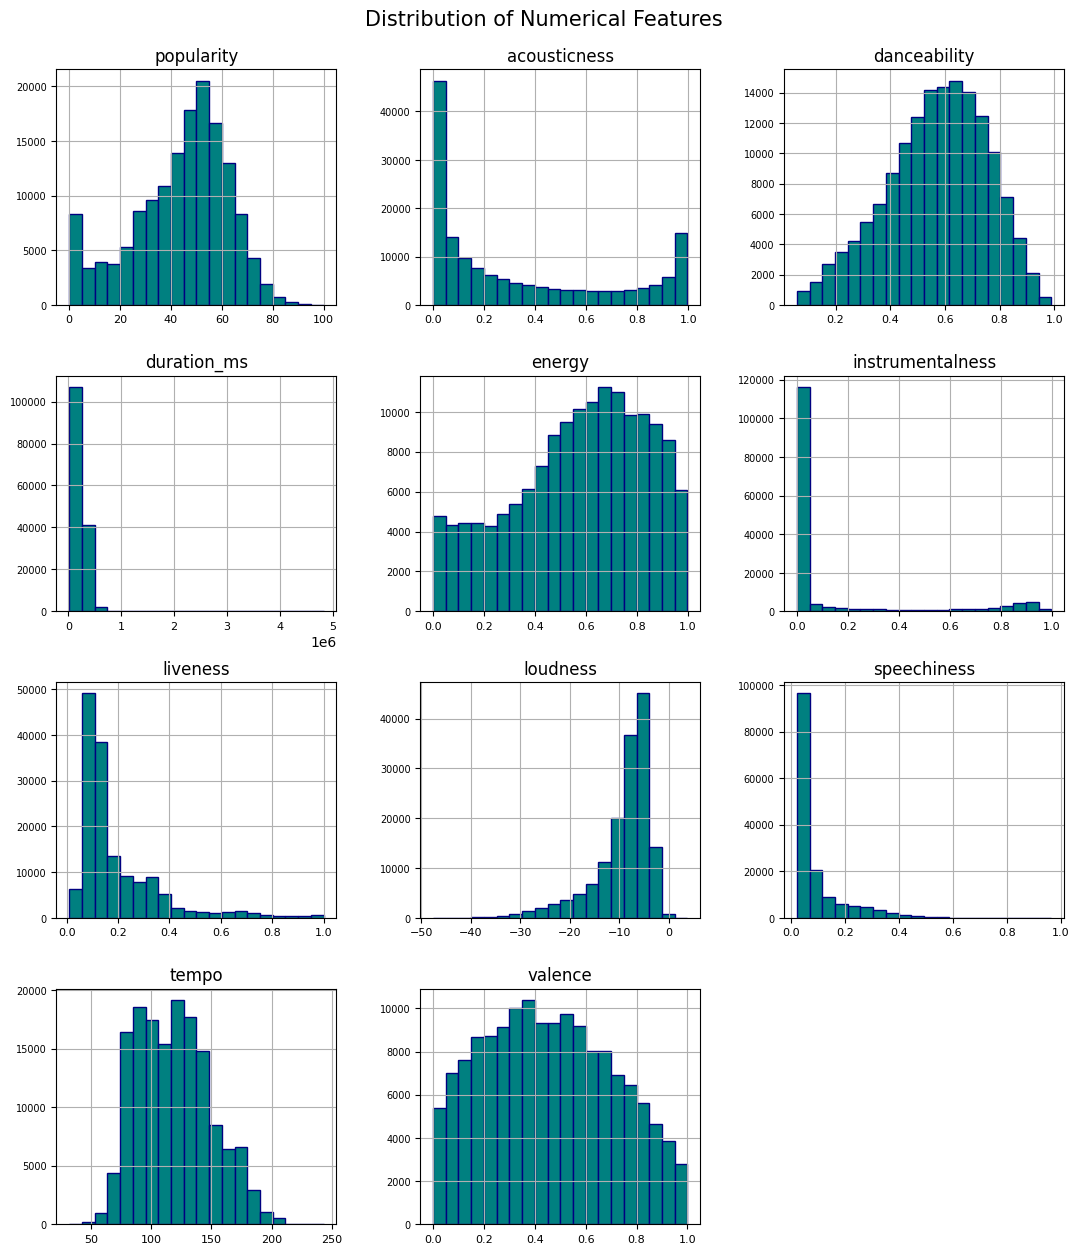

In [8]:
df.hist(figsize = (13, 15), bins = 20, xlabelsize = 8, ylabelsize = 7, color = 'teal', edgecolor = 'navy')
plt.suptitle("Distribution of Numerical Features",fontsize = 15, y = 0.92)
plt.show()

Dropping useless cols and checking nulls

In [9]:
df = df.drop(['track_id', 'track_name', 'artist_name'], axis=1)
df.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [10]:
df.isnull().sum()

,0
genre,0
popularity,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0


Defining the arrays

In [11]:
X = df.drop('popularity', axis=1)
y = df['popularity']

# EDA

Seperating string and numerical columns

In [12]:
categorical_features = ['genre', 'key', 'mode', 'time_signature']
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

Creating Pipelines

In [13]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Model Pipeline with above preprocessor and the model

In [14]:
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

Hyperparameter tuning for alpha

In [15]:
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 50, 100]
}

grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

Heatmap for showing correlation between different fetures

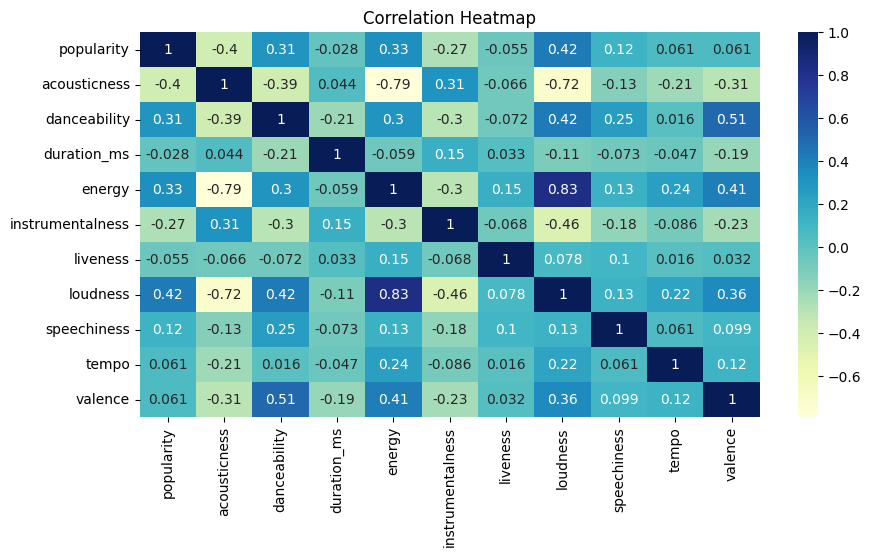

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap = 'YlGnBu')
plt.title('Correlation Heatmap') # Visualizing correlations between numerical features
plt.show()

Splittig dataset into training and testing sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the model

In [18]:
grid_search.fit(X_train, y_train)
print("Best alpha:", grid_search.best_params_['ridge__alpha'])

Best alpha: 0.01


Predictions

In [19]:
y_pred = grid_search.predict(X_test)
y_pred

array([49.79044664, 50.58330297,  4.10361418, ..., 59.8993804 ,
       62.23981545, 55.77525526])

Evaluating the model (RMSE and R^2 Score)

In [20]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")

RMSE: 9.018948133091445
R^2 Score: 0.773757365034048


# VISUALISATIONS

Actual vs Predicted Graph

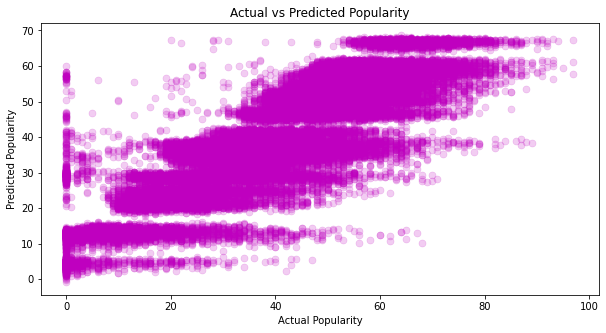

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x = y_test, y = y_pred, alpha = 0.2, edgecolor = None, s = 50, marker = 'o', color = 'm')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity')
plt.show()

Residual Plot (differene between y_test and y_pred)

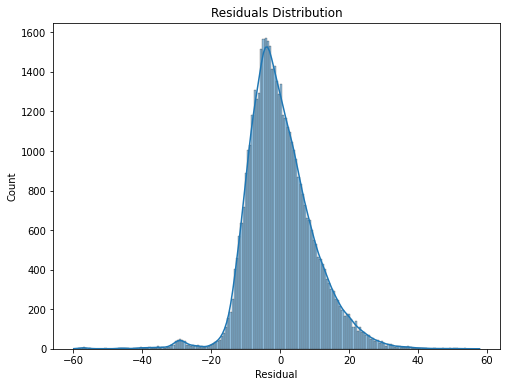

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residual')
plt.title('Residuals Distribution')
plt.show()

Features affecting popularity graph

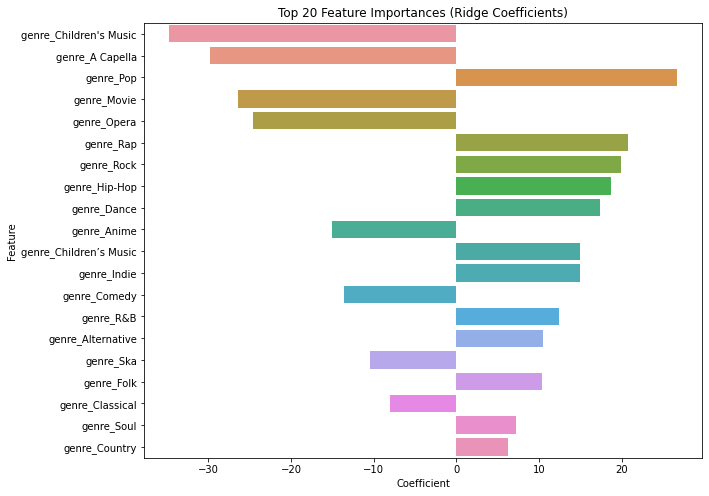

In [ ]:
best_ridge = grid_search.best_estimator_.named_steps['ridge']
preprocessor_fit = grid_search.best_estimator_.named_steps['preprocessor']

onehot_features = preprocessor_fit.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_features = numeric_features + onehot_features.tolist()

coef_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': best_ridge.coef_
}).sort_values(by = 'Coefficient', key = abs, ascending = False)

plt.figure(figsize = (10, 8))
sns.barplot(x = 'Coefficient', y = 'Feature', data = coef_df.head(20))
plt.title('Top 20 Feature Importances (Ridge Coefficients)')
plt.show()

Predictor using all the values

In [ ]:
def predict_popularity(genre, key, mode, time_signature,
                       acousticness, danceability, duration_ms,
                       energy, instrumentalness, liveness,
                       loudness, speechiness, tempo, valence):

    input_data = pd.DataFrame({
        'genre': [genre],
        'key': [key],
        'mode': [mode],
        'time_signature': [time_signature],
        'acousticness': [acousticness],
        'danceability': [danceability],
        'duration_ms': [duration_ms],
        'energy': [energy],
        'instrumentalness': [instrumentalness],
        'liveness': [liveness],
        'loudness': [loudness],
        'speechiness': [speechiness],
        'tempo': [tempo],
        'valence': [valence]
    })

    predicted_popularity = grid_search.predict(input_data)
    print(f"Predicted Popularity Score: {predicted_popularity[0]:.2f}")

predict_popularity(
    genre='Pop',
    key='C',
    mode='Major',
    time_signature='4/4',
    acousticness=0.3,
    danceability=0.7,
    duration_ms=210000,
    energy=0.8,
    instrumentalness=0.0,
    liveness=0.1,
    loudness=-5.0,
    speechiness=0.05,
    tempo=120.0,
    valence=0.9
)

Predicted Popularity Score: 66.42


Predictor using more general values

In [ ]:
def simplified_predict_popularity(genre, mood, tempo_category, duration_category):

    # Map mood to features
    mood_mapping = {
        'Happy': {'valence': 0.8, 'energy': 0.7, 'acousticness': 0.2},
        'Sad': {'valence': 0.3, 'energy': 0.4, 'acousticness': 0.5},
        'Energetic': {'valence': 0.9, 'energy': 0.85, 'acousticness': 0.1},
        'Calm': {'valence': 0.5, 'energy': 0.3, 'acousticness': 0.6}
    }

    # Map tempo category to tempo BPM
    tempo_mapping = {
        'Slow': 70,
        'Medium': 110,
        'Fast': 140
    }

    # Map duration category to ms
    duration_mapping = {
        'Short': 150000,
        'Medium': 210000,
        'Long': 270000
    }

    # Default other technical features (dataset mean estimates)
    input_data = pd.DataFrame({
        'genre': [genre],
        'key': ['C'],  # default hota h
        'mode': ['Major'],  # default mode hota
        'time_signature': ['4/4'],  # common signature
        'acousticness': [mood_mapping[mood]['acousticness']],
        'danceability': [0.6],  # average
        'duration_ms': [duration_mapping[duration_category]],
        'energy': [mood_mapping[mood]['energy']],
        'instrumentalness': [0.0],  # assume typical songs are not instrumental
        'liveness': [0.1],  # average
        'loudness': [-5.0],  # typical loudness
        'speechiness': [0.05],  # typical value
        'tempo': [tempo_mapping[tempo_category]],
        'valence': [mood_mapping[mood]['valence']]
    })

    predicted_popularity = grid_search.predict(input_data)
    print(f"Predicted Popularity Score for a {mood} {genre} song ({tempo_category} tempo, {duration_category} duration): {predicted_popularity[0]:.2f}")

simplified_predict_popularity(
    genre='Pop',
    mood='Sad',
    tempo_category='Slow',
    duration_category='Medium'
)


Predicted Popularity Score for a Sad Pop song (Slow tempo, Medium duration): 67.62


Checking for various values in order to substitute them with the more general values

In [ ]:
df['danceability'].mean()

0.5543644692233323

In [ ]:
df['instrumentalness'].mean()

0.14830123363970352

In [ ]:
df['loudness'].mean()

-9.56988540122462

In [ ]:
df['liveness'].mean()

0.2150092845203567

In [ ]:
df['speechiness'].mean()

0.12076501450209476

In [ ]:
df['key'].unique()

array(['C#', 'F#', 'C', 'F', 'G', 'E', 'D#', 'G#', 'D', 'A#', 'A', 'B'],
      dtype=object)

In [ ]:
df['key'].mode()[0]

'C'

In [ ]:
df['key'].max()

'G#'

In [ ]:
df['mode'].unique()

array(['Major', 'Minor'], dtype=object)

In [ ]:
df['mode'].max()

'Minor'

In [ ]:
df['mode'].mode()[0]

'Major'

In [ ]:
df['time_signature'].unique()

array(['4/4', '5/4', '3/4', '1/4', '0/4'], dtype=object)

In [ ]:
df['time_signature'].max()

'5/4'

In [ ]:
df['time_signature'].mode()[0]

'4/4'

In [ ]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [21]:
def interactive_predict_popularity():
    print("Welcome to the Music Popularity Predictor \n")

    genre = input("Enter genre ('Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance', 'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop', 'Children\'s Music', 'Children’s Music','Rap', 'Indie', 'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack', 'World'): ").lower()

    mood = input("Enter mood (Happy, Sad, Energetic, Calm): ").lower()
    while mood not in ['happy', 'sad', 'energetic', 'calm']:
        print("Invalid mood. Choose from: Happy, Sad, Energetic, Calm")
        mood = input("Enter mood (Happy, Sad, Energetic, Calm): ").lower()

    tempo_category = input("Enter tempo category (Slow, Medium, Fast): ").lower()
    while tempo_category not in ['slow', 'medium', 'fast']:
        print("Invalid tempo category. Choose from: Slow, Medium, Fast")
        tempo_category = input("Enter tempo category (Slow, Medium, Fast): ").lower()

    duration_category = input("Enter duration category (Short, Medium, Long): ").lower()
    while duration_category not in ['short', 'medium', 'long']:
        print("Invalid duration category. Choose from: Short, Medium, Long")
        duration_category = input("Enter duration category (Short, Medium, Long): ").lower()

    mood_mapping = {
        'happy': {'valence': 0.8, 'energy': 0.7, 'acousticness': 0.2},
        'sad': {'valence': 0.3, 'energy': 0.4, 'acousticness': 0.5},
        'energetic': {'valence': 0.9, 'energy': 0.85, 'acousticness': 0.1},
        'calm': {'valence': 0.5, 'energy': 0.3, 'acousticness': 0.6}
    }

    tempo_mapping = {
        'slow': 70,
        'medium': 110,
        'fast': 140
    }

    duration_mapping = {
        'short': 150000,
        'medium': 210000,
        'long': 270000
    }

    input_data = pd.DataFrame({
        'genre': [genre],
        'key': [df['key'].mode()[0]],
        'mode': [df['mode'].mode()[0]],
        'time_signature': [df['time_signature'].mode()[0]],
        'acousticness': [mood_mapping[mood]['acousticness']],
        'danceability': [df['danceability'].mean()],
        'duration_ms': [duration_mapping[duration_category]],
        'energy': [mood_mapping[mood]['energy']],
        'instrumentalness': [df['instrumentalness'].mean()],
        'liveness': [df['liveness'].mean()],
        'loudness': [df['loudness'].mean()],
        'speechiness': [df['speechiness'].mean()],
        'tempo': [tempo_mapping[tempo_category]],
        'valence': [mood_mapping[mood]['valence']]
    })

    predicted_popularity = grid_search.predict(input_data)

    print(f"Predicted Popularity Score: {predicted_popularity[0]:.2f}")

interactive_predict_popularity()

Welcome to the Music Popularity Predictor 

Enter genre ('Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance', 'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop', 'Children's Music', 'Children’s Music','Rap', 'Indie', 'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack', 'World'): classical
Enter mood (Happy, Sad, Energetic, Calm): sad
Enter tempo category (Slow, Medium, Fast): medium
Enter duration category (Short, Medium, Long): medium
Predicted Popularity Score: 40.24
